In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schools_a as schools
from scipy import stats
import random
from ksdisc import ks_disc_2sample

/home/ezequiel/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
##
# load the school "ELA  test" data from the open api server
# load the school "MATH test" data from the open api server
# load the school "   demo  " data from the open api server
math_df = schools.load_math_tests()    #math_df.head()
ela_df  = schools.load_ela_tests()      #ela_df.head()
demo_df = schools.load_demographics()  #demo_df.head()
## combine the above dataframes
math_demo_df = schools.combine_test_data(demo_df, math_df, "math") #math_demo_df.head()
ela_demo_df  = schools.combine_test_data(demo_df, ela_df, "ela")   #ela_demo_df.head()
## Here we now load the columns with the tests of segregation from the file 
## 'segregation_tests.csv' that we build up with the script in the schools.py module
add_cols = pd.read_csv('segregation_tests.csv')
demo_df["p_value_chi2test"]    = add_cols.p_value_chi2test
demo_df["chi2_value_chi2test"] = add_cols.chi2_value_chi2test
demo_df["p_value_KStest"]      = add_cols.p_value_KStest
demo_df

,dbn,school_name,year,total_enrollment,grade_3k_pk_half_day_full,grade_k,grade_1,grade_2,grade_3,grade_4,...,non_white_1,black_hispanic,black_hispanic_1,white_asian,white_asian_1,non_white_asian,non_white_asian_1,p_value_chi2test,chi2_value_chi2test,p_value_KStest
0,01M015,P.S. 015 Roberto Clemente,2015,176,14,32,33,39,23,17,...,0.988636,162,0.920455,11,0.062500,165,0.937500,5.037568e-19,91.963914,0.000
1,01M015,P.S. 015 Roberto Clemente,2016,178,17,28,33,27,31,24,...,0.977528,156,0.876404,18,0.101124,160,0.898876,8.006815e-15,72.142654,0.000
2,01M015,P.S. 015 Roberto Clemente,2017,190,17,28,32,33,23,31,...,0.968421,162,0.852632,26,0.136842,164,0.863158,1.349405e-13,66.330297,0.000
3,01M015,P.S. 015 Roberto Clemente,2018,174,13,20,33,30,30,20,...,0.965517,143,0.821839,30,0.172414,144,0.827586,3.960238e-11,54.589621,0.000
4,01M015,P.S. 015 Roberto Clemente,2019,190,14,29,28,38,33,29,...,0.952632,152,0.800000,36,0.189474,154,0.810526,1.134036e-11,57.180185,0.000
5,01M019,P.S. 019 Asher Levy,2015,270,21,47,43,41,43,35,...,0.940741,224,0.829630,43,0.159259,227,0.840741,2.832442e-15,74.277743,0.000
6,01M019,P.S. 019 Asher Levy,2016,271,24,37,46,47,40,43,...,0.944649,231,0.852399,39,0.143911,232,0.856089,1.913137e-19,93.941937,0.000
7,01M019,P.S. 019 Asher Levy,2017,257,13,34,38,42,46,42,...,0.937743,215,0.836576,39,0.151751,218,0.848249,1.125414e-15,76.172800,0.000
8,01M019,P.S. 019 Asher Levy,2018,249,10,30,39,43,41,44,...,0.927711,208,0.835341,32,0.128514,217,0.871486,4.038807e-16,78.275458,0.000
9,01M019,P.S. 019 Asher Levy,2019,236,16,25,27,39,45,42,...,0.919492,197,0.834746,30,0.127119,206,0.872881,2.441183e-15,74.583045,0.000


In [3]:
#######Step 1: Import Necessary Packages
#
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [5]:
##### Step 2: Load the Data
#
#select subset of data
data = demo_df[["total_enrollment", "asian", "white", "black", "hispanic","multiple_race_categories",
                  "p_value_chi2test"]]
#view first six rows of data
data[0:6]

,total_enrollment,asian,white,black,hispanic,multiple_race_categories,p_value_chi2test
0,176,9,2,57,105,3,5.037568e-19
1,178,14,4,51,105,4,8.006815e-15
2,190,20,6,52,110,2,1.349405e-13
3,174,24,6,48,95,1,3.960238e-11
4,190,27,9,56,96,2,1.134036e-11
5,270,27,16,55,169,3,2.832442e-15


/home/ezequiel/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:67: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/home/ezequiel/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/home/ezequiel/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:67: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/home/ezequiel/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:322: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/home/ezequiel/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:67: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_

Text(0.5, 1.0, 'p_value_chi2test')

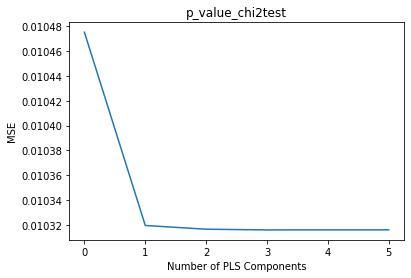

In [7]:
####Step 3: Fit the Partial Least Squares Model
#
#define predictor and response variables
X = data[["total_enrollment", "asian", "white", "black", "hispanic","multiple_race_categories"]]
y = data[["p_value_chi2test"]]
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('p_value_chi2test')


In [8]:
#### Step 4: Use the Final Model to Make Predictions
#
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

0.09521189686460947